<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

#!pip install plotly
import plotly.express as px # high level interface
import plotly.graph_objects as go # lower level interface

In [3]:
# 5 pre-requisite rule
### 1) Every data should be numeric in nature, not in category
### 2) Data Type is correct or not - make sure you have DateTime column and Target variable (VWAP)
### 3) There should not be any missing data, if yes, first impute and then try to solve TSF
### 4) Data should be sequential order (DATETIME Columns) - TimeSeries always in an ascending order
### 5) We have to check whether in the given dataset - do we have Trend, Seasonality, Cyclicity and Irregular (Noise/Error)


In [4]:
# Creating pandas df
df = pd.read_csv('YahooFinance.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163722 entries, 0 to 163721
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                163722 non-null  object 
 1   Symbol              163722 non-null  object 
 2   Series              163722 non-null  object 
 3   Prev Close          163722 non-null  float64
 4   Open                163722 non-null  float64
 5   High                163722 non-null  float64
 6   Low                 163722 non-null  float64
 7   Last                163722 non-null  float64
 8   Close               163722 non-null  float64
 9   VWAP                163721 non-null  float64
 10  Volume              163721 non-null  float64
 11  Turnover            163721 non-null  float64
 12  Trades              83504 non-null   float64
 13  Deliverable Volume  152477 non-null  float64
 14  %Deliverble         152477 non-null  float64
dtypes: float64(12), object(3)
memory u

In [6]:
df['Symbol'].value_counts()

,count
Symbol,
HDFC,5306
IOC,5306
DRREDDY,5306
CIPLA,5306
BPCL,5306
HDFCBANK,5306
GRASIM,5306
ICICIBANK,5306
ITC,5306


In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163722 entries, 0 to 163721
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                163722 non-null  datetime64[ns]
 1   Symbol              163722 non-null  object        
 2   Series              163722 non-null  object        
 3   Prev Close          163722 non-null  float64       
 4   Open                163722 non-null  float64       
 5   High                163722 non-null  float64       
 6   Low                 163722 non-null  float64       
 7   Last                163722 non-null  float64       
 8   Close               163722 non-null  float64       
 9   VWAP                163721 non-null  float64       
 10  Volume              163721 non-null  float64       
 11  Turnover            163721 non-null  float64       
 12  Trades              83504 non-null   float64       
 13  Deliverable Volume  152477 no

In [9]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [10]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [11]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,1


In [14]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['VWAP']))
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))
print(sm.stats.durbin_watson(df['Volume']))
print(sm.stats.durbin_watson(df['High']))
print(sm.stats.durbin_watson(df['Low']))

nan
0.001486817006105771
0.001434892553903354
nan
0.001371273686249468
0.0014323209283196765


In [15]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,163722,163722.000000,163722.000000,163722.000000,163722.000000,163722.000000,163722.000000,163721.000000,1.637210e+05,1.637210e+05,8.350400e+04,1.524770e+05,152477.000000
mean,2011-05-14 20:17:08.006010368,1303.542990,1305.069863,1323.781754,1284.824401,1303.699330,1303.825102,1304.423658,2.577121e+06,1.464984e+14,5.780264e+04,1.271337e+06,0.522847
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,3.000000e+00,1.047000e+07,2.000000e+01,6.000000e+00,0.027900
25%,2006-06-19 06:00:00,281.350000,281.900000,286.800000,276.300000,281.500000,281.400000,281.580000,1.922510e+05,1.435559e+13,2.070350e+04,1.178600e+05,0.398200
50%,2011-08-08 00:00:00,609.000000,610.000000,620.200000,598.000000,609.050000,609.200000,609.850000,8.425640e+05,6.301529e+13,4.097500e+04,4.394720e+05,0.530300
75%,2016-06-20 00:00:00,1322.837500,1324.937500,1343.487500,1303.250000,1322.812500,1323.200000,1323.540000,2.532262e+06,1.668308e+14,7.292350e+04,1.356504e+06,0.648600
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2548.262008,2552.359277,2584.043522,2515.559657,2547.925422,2548.505232,2549.423642,5.937593e+06,3.006473e+14,6.362037e+04,2.842985e+06,0.180330


In [16]:
df.nunique()

,0
Date,5306
Symbol,45
Series,1
Prev Close,55773
Open,38281
High,42550
Low,44647
Last,42474
Close,55779
VWAP,111400


In [17]:
df1=df.copy()

In [18]:
df1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163717,2011-02-03,POWERGRID,EQ,95.55,95.50,98.95,95.05,98.55,98.65,97.71,4653190.0,4.546844e+13,NaN,2971862.0,0.6387
163718,2011-02-04,POWERGRID,EQ,98.65,98.45,100.20,97.15,97.55,97.30,98.78,7641970.0,7.548778e+13,NaN,5336927.0,0.6984
163719,2011-02-07,POWERGRID,EQ,97.30,97.35,98.50,96.50,98.10,97.80,97.53,5667580.0,5.527395e+13,NaN,4388452.0,0.7743
163720,2011-02-08,POWERGRID,EQ,97.80,99.00,99.00,95.45,95.90,95.70,97.27,3920205.0,3.813073e+13,NaN,2314823.0,0.5905


In [19]:
df1.set_index('Date',inplace=True)

In [20]:
df1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-03,POWERGRID,EQ,95.55,95.50,98.95,95.05,98.55,98.65,97.71,4653190.0,4.546844e+13,NaN,2971862.0,0.6387
2011-02-04,POWERGRID,EQ,98.65,98.45,100.20,97.15,97.55,97.30,98.78,7641970.0,7.548778e+13,NaN,5336927.0,0.6984
2011-02-07,POWERGRID,EQ,97.30,97.35,98.50,96.50,98.10,97.80,97.53,5667580.0,5.527395e+13,NaN,4388452.0,0.7743


In [22]:
start_date = df1.index.min()
end_date = df1.index.max()
print("Start Date of Stocks:",start_date)
print("End Date of Stocks:",end_date)

Start Date of Stocks: 2000-01-03 00:00:00
End Date of Stocks: 2021-04-30 00:00:00


<Axes: xlabel='Date'>

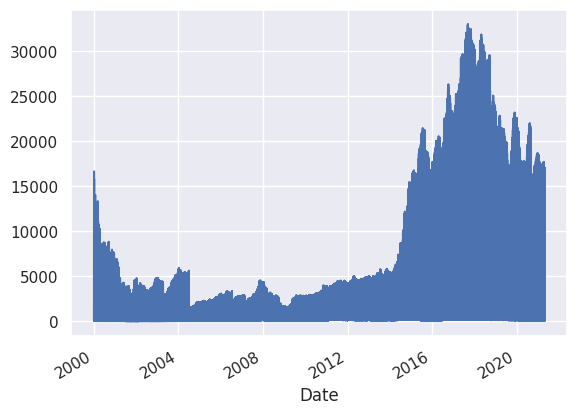

In [23]:
df1['VWAP'].plot()

In [26]:
df1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-03,POWERGRID,EQ,95.55,95.50,98.95,95.05,98.55,98.65,97.71,4653190.0,4.546844e+13,NaN,2971862.0,0.6387
2011-02-04,POWERGRID,EQ,98.65,98.45,100.20,97.15,97.55,97.30,98.78,7641970.0,7.548778e+13,NaN,5336927.0,0.6984
2011-02-07,POWERGRID,EQ,97.30,97.35,98.50,96.50,98.10,97.80,97.53,5667580.0,5.527395e+13,NaN,4388452.0,0.7743


In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

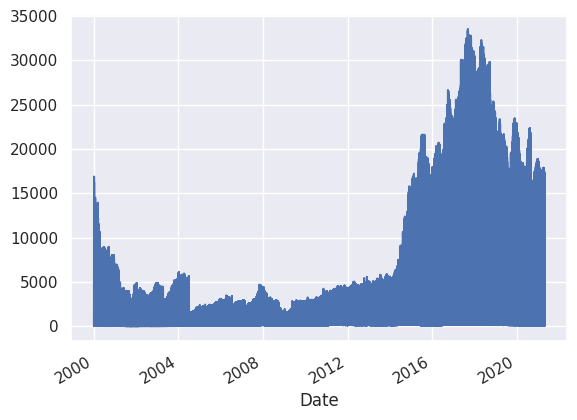

In [33]:
df1['High'].plot()